In [14]:
%pip install matplotlib


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Plotting top words and sentence length distributions for each split...


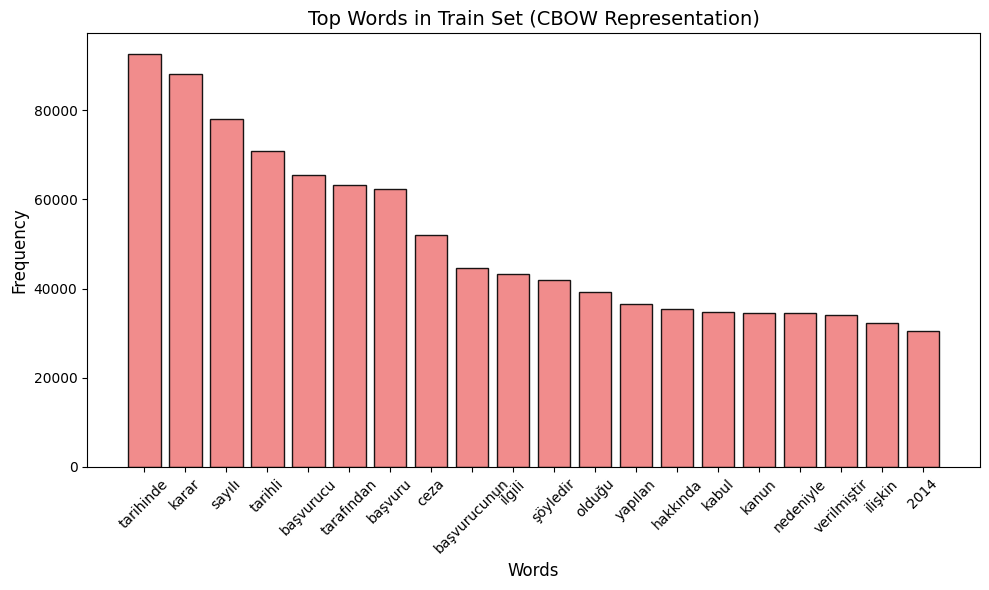

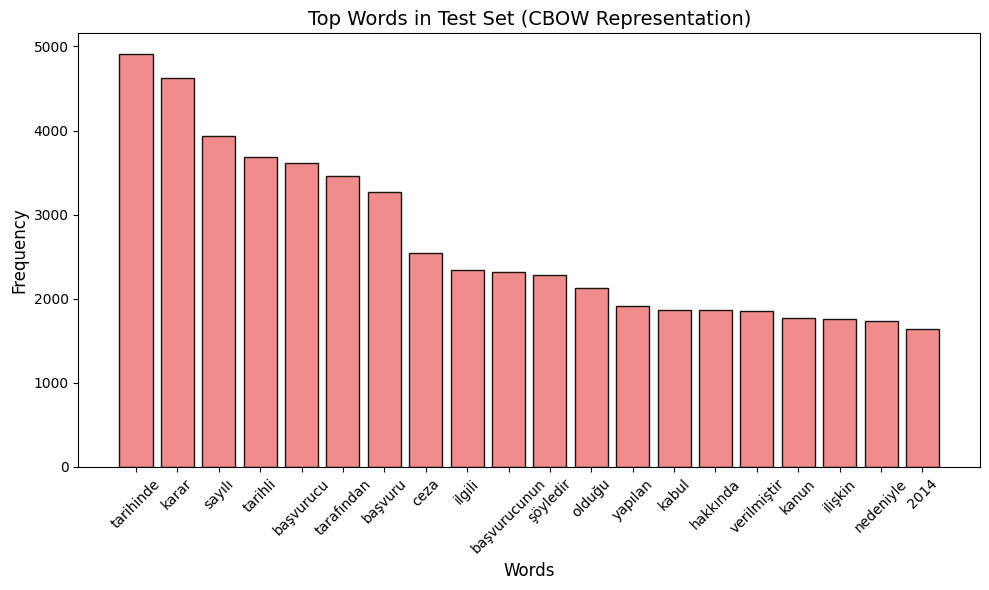

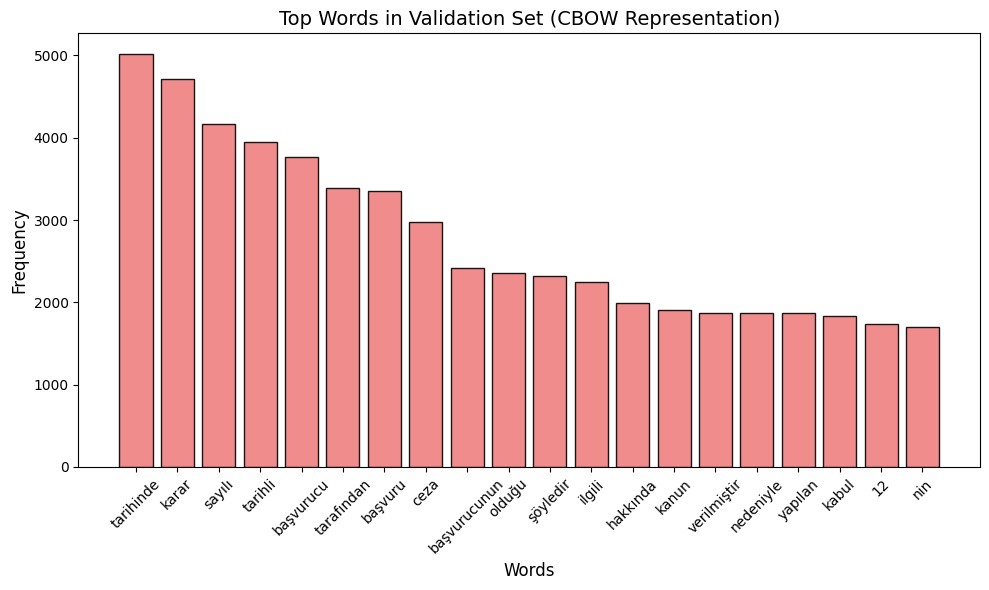

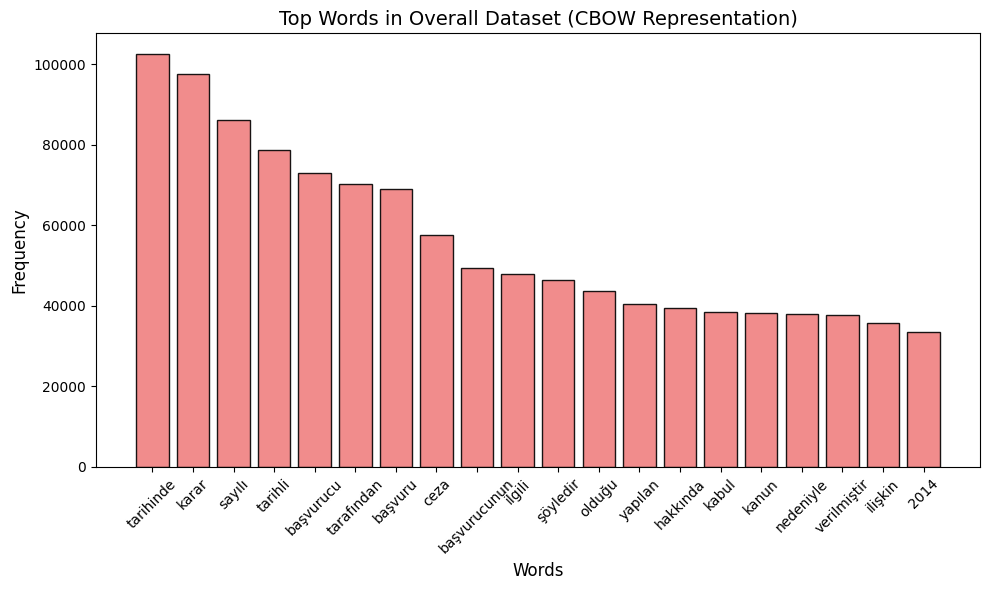

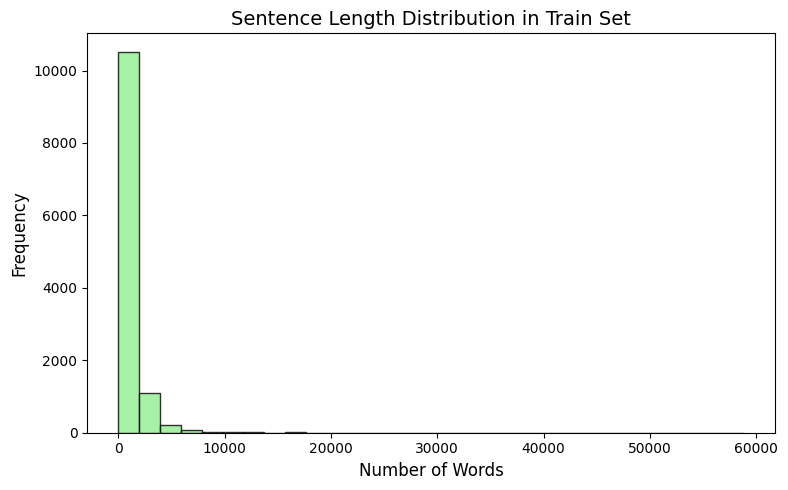

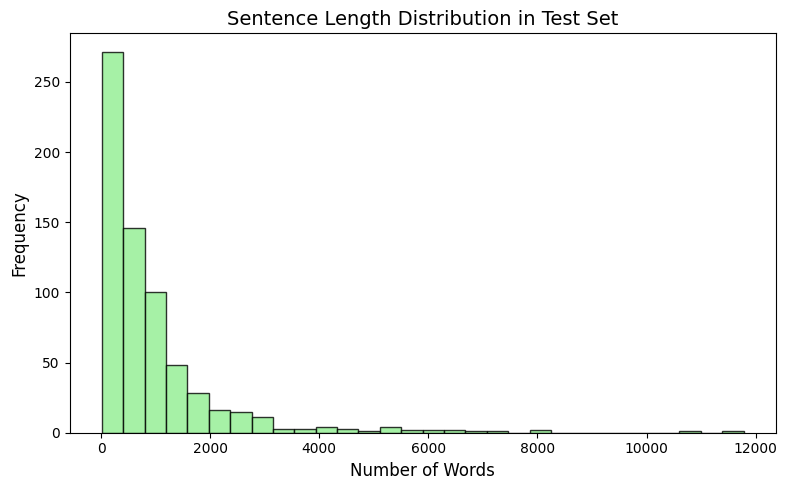

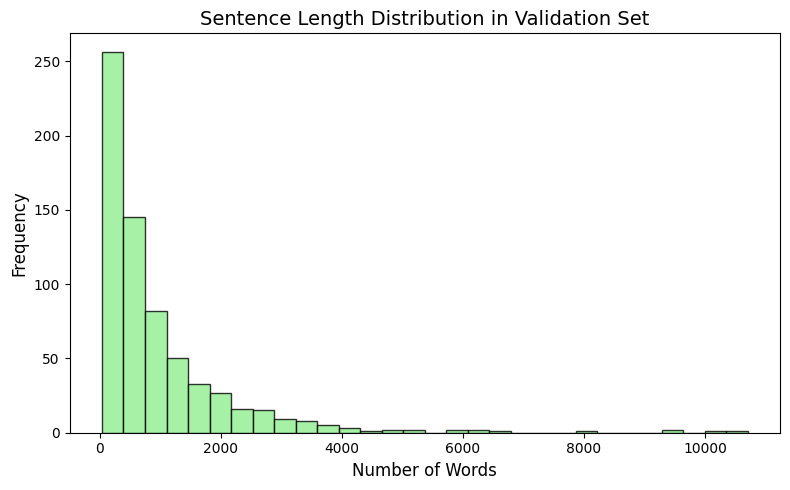

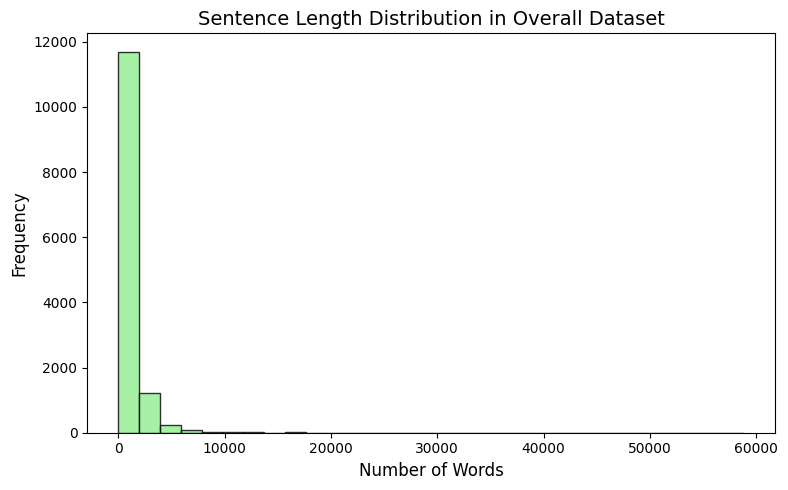

In [15]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

# Path to the folder containing JSON files
data_folder = "../Dataset/json"

# File paths
train_file = os.path.join(data_folder, "train.json")
test_file = os.path.join(data_folder, "test.json")
dev_file = os.path.join(data_folder, "dev.json")

# Function to load JSON files and convert to a DataFrame
def load_json_to_dataframe(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        data = json.load(f)
    df = pd.DataFrame(data)
    return df

# Load data
train_df = load_json_to_dataframe(train_file)
test_df = load_json_to_dataframe(test_file)
dev_df = load_json_to_dataframe(dev_file)

# Function to plot label distribution
def plot_label_distribution(df, title):
    label_counts = df['labels'].value_counts()
    label_percent = (label_counts / label_counts.sum()) * 100

    plt.figure(figsize=(8, 5))
    label_counts.plot(kind='bar', color='skyblue', alpha=0.8, edgecolor='black')
    plt.title(f'{title}\n(Counts and Percentages)', fontsize=14)
    plt.xlabel('Labels', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

    for i, count in enumerate(label_counts):
        percentage = label_percent[i]
        plt.text(i, count + 2, f'{count}\n({percentage:.1f}%)', ha='center', fontsize=10)

    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

# CBOW representation using CountVectorizer
def plot_top_words(df, title, num_words=20):
    turkish_stop_words = [
        "ve", "bir", "bu", "ile", "de", "da", "için", "ama", "çünkü", "ne", "veya",
        "çok", "birçok", "diğer", "şu", "ise", "ile", "gibi", "olarak", "daha", "hem", "her", "ve", "ya", "olan"
    ]

    vectorizer = CountVectorizer(max_features=1000, stop_words=turkish_stop_words)
    X = vectorizer.fit_transform(df['text'])
    word_counts = X.toarray().sum(axis=0)
    words = vectorizer.get_feature_names_out()

    top_words = pd.DataFrame({'word': words, 'count': word_counts}).nlargest(num_words, 'count')

    plt.figure(figsize=(10, 6))
    plt.bar(top_words['word'], top_words['count'], color='lightcoral', alpha=0.9, edgecolor='black')
    plt.title(f'Top Words in {title} (CBOW Representation)', fontsize=14)
    plt.xlabel('Words', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.xticks(rotation=45, fontsize=10)
    plt.tight_layout()
    plt.show()

# Sentence length distribution
def plot_sentence_length_distribution(df, title):
    sentence_lengths = df['text'].apply(lambda x: len(x.split()))
    plt.figure(figsize=(8, 5))
    plt.hist(sentence_lengths, bins=30, color='lightgreen', alpha=0.8, edgecolor='black')
    plt.title(f'Sentence Length Distribution in {title}', fontsize=14)
    plt.xlabel('Number of Words', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.tight_layout()
    plt.show()

def plot_label_distribution_pie(df, title):
    label_counts = df['labels'].value_counts()
    label_percent = (label_counts / label_counts.sum()) * 100

    plt.figure(figsize=(8, 8))
    plt.pie(label_counts, labels=label_counts.index, autopct=lambda p: f'{p:.1f}%\n({int(p * label_counts.sum() / 100)})',
            colors=plt.cm.Paired.colors, startangle=140)
    plt.title(f'{title}\n(Label Distribution)', fontsize=14)
    plt.tight_layout()
    plt.show()
    

# Plot label distributions
# Plot label distributions as pie charts
combined_df = pd.concat([train_df, test_df, dev_df], ignore_index=True)
# Combined pie chart for overall label distribution


# Plot CBOW and Sentence Length Distributions
print("Plotting top words and sentence length distributions for each split...")
plot_top_words(train_df, 'Train Set')
plot_top_words(test_df, 'Test Set')
plot_top_words(dev_df, 'Validation Set')
plot_top_words(combined_df, 'Overall Dataset')

plot_sentence_length_distribution(train_df, 'Train Set')
plot_sentence_length_distribution(test_df, 'Test Set')
plot_sentence_length_distribution(dev_df, 'Validation Set')
plot_sentence_length_distribution(combined_df, 'Overall Dataset')


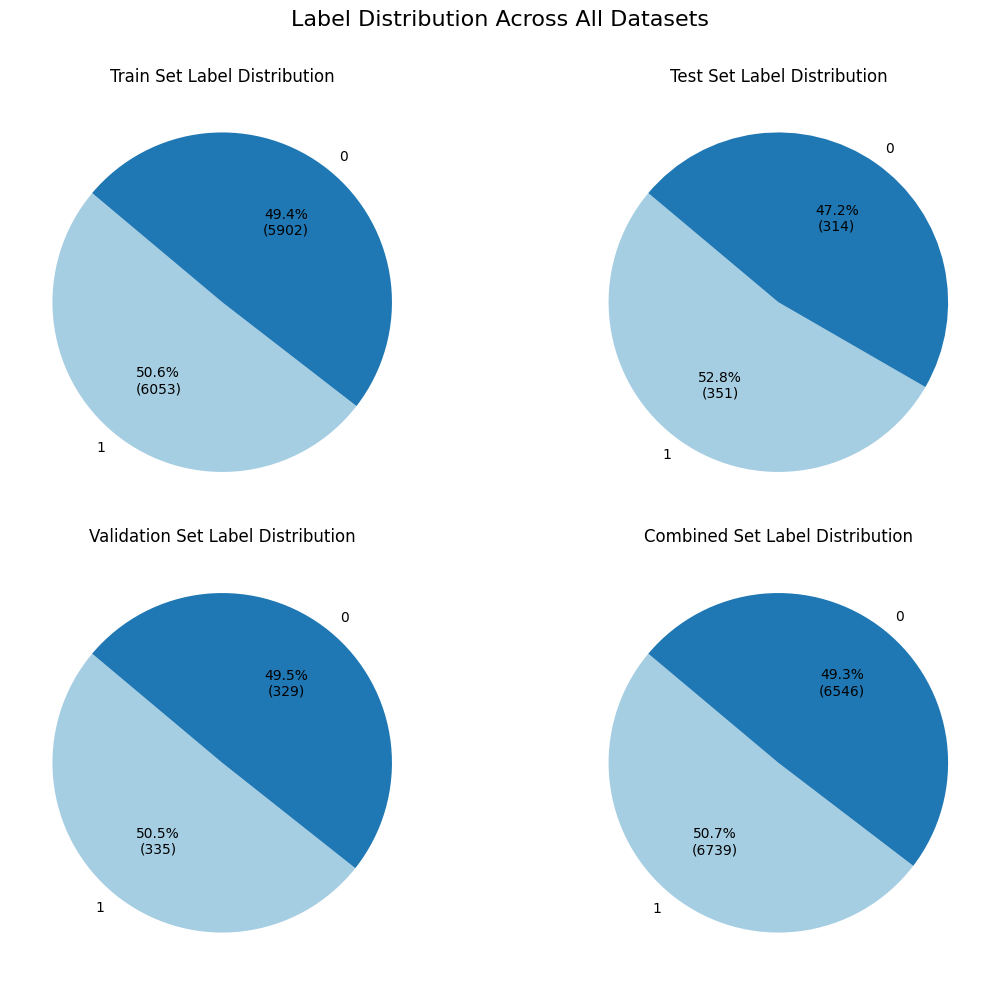

In [16]:
# Function to plot grouped label distributions as a single figure with four pie charts
def plot_all_label_distributions_pie(train_df, test_df, dev_df, combined_df, title):
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))
    datasets = [
        ("Train Set", train_df, axs[0, 0]),
        ("Test Set", test_df, axs[0, 1]),
        ("Validation Set", dev_df, axs[1, 0]),
        ("Combined Set", combined_df, axs[1, 1]),
    ]
    
    for name, df, ax in datasets:
        label_counts = df['labels'].value_counts()
        label_percent = (label_counts / label_counts.sum()) * 100
        
        ax.pie(
            label_counts, 
            labels=label_counts.index, 
            autopct=lambda p: f'{p:.1f}%\n({int(p * label_counts.sum() / 100)})', 
            colors=plt.cm.Paired.colors, 
            startangle=140
        )
        ax.set_title(f"{name} Label Distribution", fontsize=12)

    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)  # Add space for the main title
    plt.show()

# Plot all label distributions
plot_all_label_distributions_pie(train_df, test_df, dev_df, combined_df, 'Label Distribution Across All Datasets')


C:\Users\imohm\AppData\Local\Temp\ipykernel_20660\444685418.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  percentage = rights_percent[rights_counts.index.get_loc(rights_counts.sort_values().index[i])]


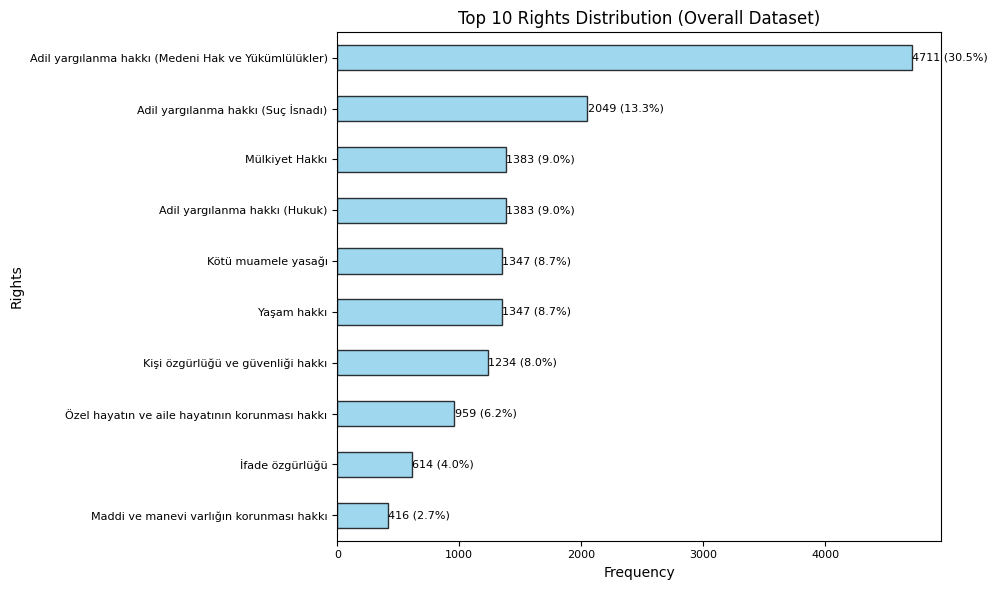

In [17]:
def plot_top_rights_distribution_horizontal(combined_df, title, top_n=10):
    fig, ax = plt.subplots(figsize=(10, 6))

    # Extract and split rights (Haklar)
    rights = combined_df['Haklar'].dropna().str.split('-').explode().str.strip()
    rights_counts = rights.value_counts().head(top_n)  # Limit to top N rights
    rights_percent = (rights_counts / rights_counts.sum()) * 100

    # Plot horizontal bar chart
    rights_counts.sort_values().plot(
        kind='barh', ax=ax, color='skyblue', alpha=0.8, edgecolor='black'
    )
    
    # Add title and labels
    ax.set_title(title, fontsize=12)  # Smaller title font
    ax.set_xlabel("Frequency", fontsize=10)  # X-axis label
    ax.set_ylabel("Rights", fontsize=10)  # Y-axis label
    ax.tick_params(axis='x', labelsize=8)  # X-axis tick labels
    ax.tick_params(axis='y', labelsize=8)  # Y-axis tick labels

    # Adding frequency and percentage labels next to bars
    for i, count in enumerate(rights_counts.sort_values()):
        percentage = rights_percent[rights_counts.index.get_loc(rights_counts.sort_values().index[i])]
        ax.text(count + 2, i, f'{count} ({percentage:.1f}%)', va='center', fontsize=8)

    # Adjust layout for better spacing
    plt.tight_layout()
    plt.show()

# Plot the top 10 rights for the combined dataset
plot_top_rights_distribution_horizontal(combined_df, "Top 10 Rights Distribution (Overall Dataset)", top_n=10)
